# Import dependencies

In [1]:
# Reload modules whenever underlying code changes
%load_ext autoreload
%autoreload 2

In [2]:
# pdb will automatically run on exceptions
#%pdb on # currently not working due to https://github.com/ipython/ipykernel/issues/422

In [3]:
# import os

# # Only occupy one GPU, as in https://stackoverflow.com/questions/37893755/tensorflow-set-cuda-visible-devices-within-jupyter
# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
# os.environ["CUDA_VISIBLE_DEVICES"]="0"

# # Only allocate GPU memory as needed
# os.environ["TF_FORCE_GPU_ALLOW_GROWTH"]="true"

# # Suppress tf warning messages
# os.environ["TF_CPP_MIN_LOG_LEVEL"]="3"

In [4]:
%matplotlib inline
from sgm.dependencies import *


Bad key savefig.frameon in file /home/mgaltier200/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file /home/mgaltier200/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file /home/mgaltier200/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probably 

# Initialize untrained agent

In [5]:
# config = tf.ConfigProto()
# config.gpu_options.allow_growth = True
# tf.enable_eager_execution(config=config)

In [6]:
#tf.debugging.set_log_device_placement(True)
#tf.test.is_gpu_available()

In [7]:
tf.reset_default_graph()

In [8]:
from sgm.envs import env_load_fn
from sgm.agent import UvfAgent

# If you change the environment parameters below, make sure to run
# tf.reset_default_graph() in the cell above before training.
max_episode_steps = 20
env_name = 'FourRooms'  # Choose one of the environments shown above. 
resize_factor = 1  # Inflate the environment to increase the difficulty.
thin = True # If True, resize by expanding open space, not walls, to make walls thin
desc_name = "thinned_" + env_name.lower() if thin else env_name.lower()

base_dir = os.path.join(os.getcwd(), os.pardir, "agents")
model_dir = os.path.join(base_dir, desc_name)

tf_env = env_load_fn(env_name, max_episode_steps,
                     resize_factor=resize_factor,
                     terminate_on_timeout=False,
                     thin=thin)
eval_tf_env = env_load_fn(env_name, max_episode_steps,
                          resize_factor=resize_factor,
                          terminate_on_timeout=True,
                          thin=thin)

agent = UvfAgent(
    tf_env.time_step_spec(),
    tf_env.action_spec(),
    max_episode_steps=max_episode_steps,
    use_distributional_rl=True,
    ensemble_size=3)

/home/mgaltier200/anaconda3/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


# Train the agent

In [9]:
from sgm.trainer import train_eval

train_eval(agent,
          tf_env,
          eval_tf_env,
          initial_collect_steps=1000,
          eval_interval=1000,
          num_eval_episodes=10,
          num_iterations=30000,
          save_model_dir=model_dir,
          experiment_name=f"{env_name}_coordinate_{max_episode_steps}steps")

INFO:tensorflow:random_seed = 0
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
INFO:tensorflow:Saving checkpoints to directory /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-44-48-AM/ckpt
INFO:tensorflow:Creating tensorboard summary writer with directory /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-44-48-AM
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



  3%|▎         | 999/30000 [00:17<07:13, 66.92it/s] 

Saved checkpoint for step 1000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-44-48-AM/ckpt/ckpt-1
INFO:tensorflow:step = 1000, loss = 2.365058
INFO:tensorflow:60.487 steps/sec
INFO:tensorflow:step = 1000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.20
INFO:tensorflow:		 predicted_dist = 12.5 (2.2)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -17.20
INFO:tensorflow:		 predicted_dist = 16.0 (0.4)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -20.00
INFO:tensorflow:		 predicted_dist = 17.3 (0.3)
INFO:tensorflow:	 eval_time = 2.59


  7%|▋         | 1993/30000 [00:35<06:18, 73.91it/s]

Saved checkpoint for step 2000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-44-48-AM/ckpt/ckpt-2
INFO:tensorflow:step = 2000, loss = 2.768646
INFO:tensorflow:71.823 steps/sec
INFO:tensorflow:step = 2000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -6.10
INFO:tensorflow:		 predicted_dist = 9.2 (3.1)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -14.00
INFO:tensorflow:		 predicted_dist = 14.0 (1.8)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -19.00
INFO:tensorflow:		 predicted_dist = 16.0 (1.5)
INFO:tensorflow:	 eval_time = 2.32


 10%|▉         | 2996/30000 [00:53<06:56, 64.90it/s]

Saved checkpoint for step 3000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-44-48-AM/ckpt/ckpt-3
INFO:tensorflow:step = 3000, loss = 3.017542
INFO:tensorflow:67.960 steps/sec
INFO:tensorflow:step = 3000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -5.10
INFO:tensorflow:		 predicted_dist = 7.0 (2.1)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -10.30
INFO:tensorflow:		 predicted_dist = 12.4 (0.8)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -20.00
INFO:tensorflow:		 predicted_dist = 15.9 (1.1)
INFO:tensorflow:	 eval_time = 2.24


 13%|█▎        | 3996/30000 [01:12<06:40, 64.96it/s]

Saved checkpoint for step 4000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-44-48-AM/ckpt/ckpt-4
INFO:tensorflow:step = 4000, loss = 3.188481
INFO:tensorflow:64.805 steps/sec
INFO:tensorflow:step = 4000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -5.20
INFO:tensorflow:		 predicted_dist = 6.1 (1.5)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -12.40
INFO:tensorflow:		 predicted_dist = 11.1 (2.0)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -19.10
INFO:tensorflow:		 predicted_dist = 15.6 (1.3)
INFO:tensorflow:	 eval_time = 2.66


 17%|█▋        | 4993/30000 [01:31<06:36, 63.07it/s]

Saved checkpoint for step 5000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-44-48-AM/ckpt/ckpt-5
INFO:tensorflow:step = 5000, loss = 2.911453
INFO:tensorflow:64.522 steps/sec
INFO:tensorflow:step = 5000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -5.90
INFO:tensorflow:		 predicted_dist = 5.2 (1.6)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -13.80
INFO:tensorflow:		 predicted_dist = 10.8 (2.4)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -19.90
INFO:tensorflow:		 predicted_dist = 16.4 (1.9)
INFO:tensorflow:	 eval_time = 2.54


 20%|█▉        | 5999/30000 [01:51<07:19, 54.57it/s]

Saved checkpoint for step 6000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-44-48-AM/ckpt/ckpt-6
INFO:tensorflow:step = 6000, loss = 2.797786
INFO:tensorflow:64.593 steps/sec
INFO:tensorflow:step = 6000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -2.20
INFO:tensorflow:		 predicted_dist = 6.2 (1.6)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.70
INFO:tensorflow:		 predicted_dist = 9.9 (3.0)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -18.30
INFO:tensorflow:		 predicted_dist = 15.4 (1.8)
INFO:tensorflow:	 eval_time = 2.09


 23%|██▎       | 6995/30000 [02:10<06:03, 63.29it/s]

Saved checkpoint for step 7000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-44-48-AM/ckpt/ckpt-7
INFO:tensorflow:step = 7000, loss = 2.595836
INFO:tensorflow:64.002 steps/sec
INFO:tensorflow:step = 7000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -5.10
INFO:tensorflow:		 predicted_dist = 4.2 (1.1)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -13.50
INFO:tensorflow:		 predicted_dist = 9.5 (2.0)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -17.90
INFO:tensorflow:		 predicted_dist = 15.6 (1.5)
INFO:tensorflow:	 eval_time = 2.22


 27%|██▋       | 7993/30000 [02:29<05:42, 64.27it/s]

Saved checkpoint for step 8000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-44-48-AM/ckpt/ckpt-8
INFO:tensorflow:step = 8000, loss = 3.009369
INFO:tensorflow:65.691 steps/sec
INFO:tensorflow:step = 8000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.40
INFO:tensorflow:		 predicted_dist = 4.2 (1.8)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -11.50
INFO:tensorflow:		 predicted_dist = 9.5 (2.4)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -18.80
INFO:tensorflow:		 predicted_dist = 15.9 (1.0)
INFO:tensorflow:	 eval_time = 2.68


 30%|██▉       | 8999/30000 [02:48<06:35, 53.07it/s]

Saved checkpoint for step 9000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-44-48-AM/ckpt/ckpt-9
INFO:tensorflow:step = 9000, loss = 3.036011
INFO:tensorflow:64.922 steps/sec
INFO:tensorflow:step = 9000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -2.60
INFO:tensorflow:		 predicted_dist = 4.1 (1.5)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -11.70
INFO:tensorflow:		 predicted_dist = 8.9 (2.0)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -18.20
INFO:tensorflow:		 predicted_dist = 16.2 (1.3)
INFO:tensorflow:	 eval_time = 2.79


 33%|███▎      | 9996/30000 [03:07<05:15, 63.50it/s]

Saved checkpoint for step 10000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-44-48-AM/ckpt/ckpt-10
INFO:tensorflow:step = 10000, loss = 2.754172
INFO:tensorflow:65.439 steps/sec
INFO:tensorflow:step = 10000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -5.40
INFO:tensorflow:		 predicted_dist = 4.4 (1.5)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -10.00
INFO:tensorflow:		 predicted_dist = 10.1 (2.1)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -18.30
INFO:tensorflow:		 predicted_dist = 15.1 (1.3)
INFO:tensorflow:	 eval_time = 2.45


 37%|███▋      | 10997/30000 [03:26<04:58, 63.68it/s]

Saved checkpoint for step 11000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-44-48-AM/ckpt/ckpt-11
INFO:tensorflow:step = 11000, loss = 2.656300
INFO:tensorflow:66.392 steps/sec
INFO:tensorflow:step = 11000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -5.00
INFO:tensorflow:		 predicted_dist = 4.2 (1.5)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -15.10
INFO:tensorflow:		 predicted_dist = 7.8 (1.2)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -17.40
INFO:tensorflow:		 predicted_dist = 15.2 (2.2)
INFO:tensorflow:	 eval_time = 2.63


 40%|███▉      | 11993/30000 [03:46<04:59, 60.06it/s]

Saved checkpoint for step 12000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-44-48-AM/ckpt/ckpt-12
INFO:tensorflow:step = 12000, loss = 2.756499
INFO:tensorflow:64.819 steps/sec
INFO:tensorflow:step = 12000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -2.90
INFO:tensorflow:		 predicted_dist = 3.3 (1.6)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -9.10
INFO:tensorflow:		 predicted_dist = 9.2 (2.1)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -18.40
INFO:tensorflow:		 predicted_dist = 15.3 (0.9)
INFO:tensorflow:	 eval_time = 2.17


 43%|████▎     | 12997/30000 [04:05<04:42, 60.16it/s]

Saved checkpoint for step 13000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-44-48-AM/ckpt/ckpt-13
INFO:tensorflow:step = 13000, loss = 2.695074
INFO:tensorflow:64.948 steps/sec
INFO:tensorflow:step = 13000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.70
INFO:tensorflow:		 predicted_dist = 4.4 (1.8)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -10.70
INFO:tensorflow:		 predicted_dist = 8.8 (2.3)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -18.00
INFO:tensorflow:		 predicted_dist = 13.7 (1.7)
INFO:tensorflow:	 eval_time = 2.22


 47%|████▋     | 13998/30000 [04:24<04:44, 56.24it/s]

Saved checkpoint for step 14000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-44-48-AM/ckpt/ckpt-14
INFO:tensorflow:step = 14000, loss = 2.504527
INFO:tensorflow:65.009 steps/sec
INFO:tensorflow:step = 14000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -2.50
INFO:tensorflow:		 predicted_dist = 4.5 (1.5)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -13.70
INFO:tensorflow:		 predicted_dist = 9.7 (2.1)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -20.00
INFO:tensorflow:		 predicted_dist = 13.7 (1.9)
INFO:tensorflow:	 eval_time = 2.51


 50%|████▉     | 14999/30000 [04:43<04:57, 50.45it/s]

Saved checkpoint for step 15000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-44-48-AM/ckpt/ckpt-15
INFO:tensorflow:step = 15000, loss = 2.757848
INFO:tensorflow:65.409 steps/sec
INFO:tensorflow:step = 15000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.10
INFO:tensorflow:		 predicted_dist = 4.0 (1.6)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -13.80
INFO:tensorflow:		 predicted_dist = 9.7 (1.4)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -18.70
INFO:tensorflow:		 predicted_dist = 15.2 (1.0)
INFO:tensorflow:	 eval_time = 2.85


 53%|█████▎    | 15999/30000 [05:03<04:57, 47.01it/s]

Saved checkpoint for step 16000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-44-48-AM/ckpt/ckpt-16
INFO:tensorflow:step = 16000, loss = 2.656774
INFO:tensorflow:64.448 steps/sec
INFO:tensorflow:step = 16000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.70
INFO:tensorflow:		 predicted_dist = 4.1 (1.4)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -10.50
INFO:tensorflow:		 predicted_dist = 9.7 (2.6)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -19.00
INFO:tensorflow:		 predicted_dist = 15.8 (2.3)
INFO:tensorflow:	 eval_time = 2.39


 57%|█████▋    | 16998/30000 [05:21<03:49, 56.56it/s]

Saved checkpoint for step 17000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-44-48-AM/ckpt/ckpt-17
INFO:tensorflow:step = 17000, loss = 2.469997
INFO:tensorflow:65.661 steps/sec
INFO:tensorflow:step = 17000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.00
INFO:tensorflow:		 predicted_dist = 3.8 (1.9)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -11.10
INFO:tensorflow:		 predicted_dist = 8.1 (2.6)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -18.80
INFO:tensorflow:		 predicted_dist = 15.0 (1.2)
INFO:tensorflow:	 eval_time = 2.24


 60%|█████▉    | 17995/30000 [05:40<03:27, 57.72it/s]

Saved checkpoint for step 18000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-44-48-AM/ckpt/ckpt-18
INFO:tensorflow:step = 18000, loss = 2.644978
INFO:tensorflow:65.181 steps/sec
INFO:tensorflow:step = 18000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.10
INFO:tensorflow:		 predicted_dist = 4.9 (1.8)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -12.20
INFO:tensorflow:		 predicted_dist = 9.2 (2.7)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -17.60
INFO:tensorflow:		 predicted_dist = 14.1 (1.6)
INFO:tensorflow:	 eval_time = 2.58


 63%|██████▎   | 18995/30000 [06:00<03:09, 58.21it/s]

Saved checkpoint for step 19000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-44-48-AM/ckpt/ckpt-19
INFO:tensorflow:step = 19000, loss = 2.571399
INFO:tensorflow:64.805 steps/sec
INFO:tensorflow:step = 19000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.80
INFO:tensorflow:		 predicted_dist = 3.7 (1.4)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -10.30
INFO:tensorflow:		 predicted_dist = 9.6 (2.6)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -19.80
INFO:tensorflow:		 predicted_dist = 14.5 (2.1)
INFO:tensorflow:	 eval_time = 2.45


 67%|██████▋   | 19996/30000 [06:19<02:54, 57.21it/s]

Saved checkpoint for step 20000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-44-48-AM/ckpt/ckpt-20
INFO:tensorflow:step = 20000, loss = 2.682670
INFO:tensorflow:64.221 steps/sec
INFO:tensorflow:step = 20000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -5.80
INFO:tensorflow:		 predicted_dist = 3.7 (1.6)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -10.30
INFO:tensorflow:		 predicted_dist = 8.2 (2.8)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -19.60
INFO:tensorflow:		 predicted_dist = 14.0 (2.0)
INFO:tensorflow:	 eval_time = 2.44


 70%|██████▉   | 20998/30000 [06:38<02:35, 57.73it/s]

Saved checkpoint for step 21000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-44-48-AM/ckpt/ckpt-21
INFO:tensorflow:step = 21000, loss = 2.532881
INFO:tensorflow:65.708 steps/sec
INFO:tensorflow:step = 21000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.00
INFO:tensorflow:		 predicted_dist = 5.9 (2.6)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -10.00
INFO:tensorflow:		 predicted_dist = 10.3 (2.0)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -18.60
INFO:tensorflow:		 predicted_dist = 14.6 (1.5)
INFO:tensorflow:	 eval_time = 2.17


 73%|███████▎  | 21995/30000 [06:57<02:28, 54.06it/s]

Saved checkpoint for step 22000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-44-48-AM/ckpt/ckpt-22
INFO:tensorflow:step = 22000, loss = 2.831351
INFO:tensorflow:64.140 steps/sec
INFO:tensorflow:step = 22000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.20
INFO:tensorflow:		 predicted_dist = 3.3 (1.2)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -12.80
INFO:tensorflow:		 predicted_dist = 9.9 (2.7)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -18.60
INFO:tensorflow:		 predicted_dist = 15.8 (1.3)
INFO:tensorflow:	 eval_time = 2.50


 77%|███████▋  | 22998/30000 [07:17<01:58, 59.21it/s]

Saved checkpoint for step 23000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-44-48-AM/ckpt/ckpt-23
INFO:tensorflow:step = 23000, loss = 2.659962
INFO:tensorflow:65.042 steps/sec
INFO:tensorflow:step = 23000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -5.60
INFO:tensorflow:		 predicted_dist = 4.5 (1.7)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -12.10
INFO:tensorflow:		 predicted_dist = 8.1 (1.6)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -19.30
INFO:tensorflow:		 predicted_dist = 15.3 (1.6)
INFO:tensorflow:	 eval_time = 2.73


 80%|███████▉  | 23999/30000 [07:36<02:05, 47.81it/s]

Saved checkpoint for step 24000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-44-48-AM/ckpt/ckpt-24
INFO:tensorflow:step = 24000, loss = 2.617273
INFO:tensorflow:64.712 steps/sec
INFO:tensorflow:step = 24000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -5.80
INFO:tensorflow:		 predicted_dist = 4.2 (1.8)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -12.70
INFO:tensorflow:		 predicted_dist = 9.1 (1.6)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -18.80
INFO:tensorflow:		 predicted_dist = 15.6 (1.2)
INFO:tensorflow:	 eval_time = 2.81


 83%|████████▎ | 24996/30000 [07:56<01:30, 55.57it/s]

Saved checkpoint for step 25000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-44-48-AM/ckpt/ckpt-25
INFO:tensorflow:step = 25000, loss = 2.811090
INFO:tensorflow:64.455 steps/sec
INFO:tensorflow:step = 25000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.30
INFO:tensorflow:		 predicted_dist = 3.7 (1.3)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -12.60
INFO:tensorflow:		 predicted_dist = 9.0 (2.7)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -20.00
INFO:tensorflow:		 predicted_dist = 14.6 (2.5)
INFO:tensorflow:	 eval_time = 2.71


 87%|████████▋ | 25999/30000 [08:15<01:20, 49.73it/s]

Saved checkpoint for step 26000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-44-48-AM/ckpt/ckpt-26
INFO:tensorflow:step = 26000, loss = 2.676962
INFO:tensorflow:65.380 steps/sec
INFO:tensorflow:step = 26000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.30
INFO:tensorflow:		 predicted_dist = 4.7 (1.6)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -11.70
INFO:tensorflow:		 predicted_dist = 10.9 (2.0)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -20.00
INFO:tensorflow:		 predicted_dist = 15.3 (0.8)
INFO:tensorflow:	 eval_time = 2.23


 90%|████████▉ | 26994/30000 [08:34<00:49, 60.42it/s]

Saved checkpoint for step 27000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-44-48-AM/ckpt/ckpt-27
INFO:tensorflow:step = 27000, loss = 2.501468
INFO:tensorflow:65.439 steps/sec
INFO:tensorflow:step = 27000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -5.90
INFO:tensorflow:		 predicted_dist = 4.1 (1.6)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -9.10
INFO:tensorflow:		 predicted_dist = 9.5 (2.6)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -18.50
INFO:tensorflow:		 predicted_dist = 14.9 (1.9)
INFO:tensorflow:	 eval_time = 2.21


 93%|█████████▎| 27993/30000 [08:53<00:33, 60.20it/s]

Saved checkpoint for step 28000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-44-48-AM/ckpt/ckpt-28
INFO:tensorflow:step = 28000, loss = 2.837754
INFO:tensorflow:64.793 steps/sec
INFO:tensorflow:step = 28000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.00
INFO:tensorflow:		 predicted_dist = 3.3 (1.3)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -10.10
INFO:tensorflow:		 predicted_dist = 9.0 (2.0)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -19.70
INFO:tensorflow:		 predicted_dist = 14.0 (2.0)
INFO:tensorflow:	 eval_time = 2.50


 97%|█████████▋| 28998/30000 [09:12<00:17, 58.40it/s]

Saved checkpoint for step 29000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-44-48-AM/ckpt/ckpt-29
INFO:tensorflow:step = 29000, loss = 2.718782
INFO:tensorflow:65.341 steps/sec
INFO:tensorflow:step = 29000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.50
INFO:tensorflow:		 predicted_dist = 4.1 (1.4)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -13.40
INFO:tensorflow:		 predicted_dist = 9.7 (3.0)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -19.10
INFO:tensorflow:		 predicted_dist = 14.3 (1.6)
INFO:tensorflow:	 eval_time = 2.41


100%|█████████▉| 29999/30000 [09:31<00:00, 49.69it/s]

Saved checkpoint for step 30000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-44-48-AM/ckpt/ckpt-30
INFO:tensorflow:step = 30000, loss = 2.486357
INFO:tensorflow:66.477 steps/sec
INFO:tensorflow:step = 30000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.60
INFO:tensorflow:		 predicted_dist = 4.0 (1.7)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -12.00
INFO:tensorflow:		 predicted_dist = 9.2 (2.4)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -19.00
INFO:tensorflow:		 predicted_dist = 13.3 (1.4)
INFO:tensorflow:	 eval_time = 2.50


100%|██████████| 30000/30000 [09:33<00:00, 52.27it/s]


LossInfo(loss=<tf.Tensor: id=1149306, shape=(), dtype=float32, numpy=2.4863575>, extra=(<tf.Tensor: id=1149307, shape=(), dtype=float32, numpy=0.32336432>, <tf.Tensor: id=1149308, shape=(), dtype=float32, numpy=2.1629932>))

# Load trained model into agent

In [10]:
filename = "FourRooms_coordinate_20steps-Dec-05-2019-12-58-28-PM/ckpt/"
checkpoint_file = os.path.join(model_dir, filename)

ckpt = tf.train.Checkpoint(step=tf.Variable(1), net=agent)
manager = tf.train.CheckpointManager(ckpt, checkpoint_file, max_to_keep=3)
ckpt.restore(manager.latest_checkpoint)

# Fill replay buffer with random prefectly explored data

In [11]:
from sgm.envs import *

#@title Fill the replay buffer with random data  {vertical-output: true, run: "auto" }
replay_buffer_size = 2000 #@param {min:100, max: 1000, step: 100, type:"slider"}

eval_tf_env.pyenv.envs[0].gym.set_sample_goal_args(
    prob_constraint=0.0,
    min_dist=0,
    max_dist=np.inf)
rb_vec = []
for it in range(replay_buffer_size):
    ts = eval_tf_env.reset()
    rb_vec.append(ts.observation['observation'].numpy()[0])
rb_vec = np.array(rb_vec)

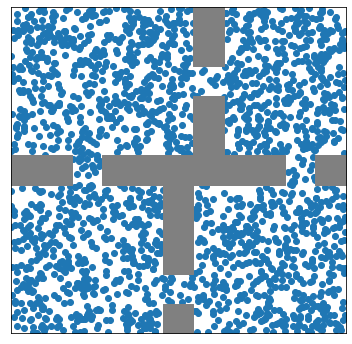

In [12]:
plt.figure(figsize=(6, 6))
plt.scatter(*rb_vec.T)
plot_walls(eval_tf_env.pyenv.envs[0].env.walls)
plt.show()

# Calculate qvalue distances

In [13]:
pdist = agent._get_pairwise_dist(rb_vec, aggregate=None).numpy()

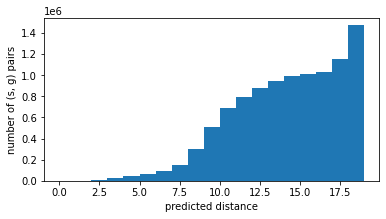

In [14]:
plt.figure(figsize=(6, 3))
plt.hist(pdist.flatten(), bins=range(20))
plt.xlabel('predicted distance')
plt.ylabel('number of (s, g) pairs')
plt.show()

# Tune edge cutoff

Plotting 209 nodes and 1961 edges


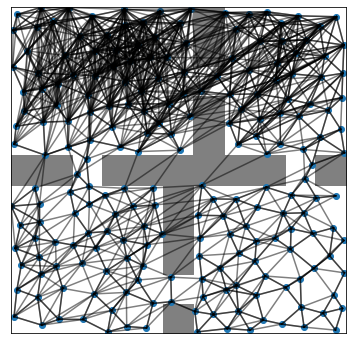

In [15]:
from sgm.planner import SGMSearchPolicy
search_policy_type = "SGM"
agent.initialize_search(rb_vec, max_search_steps=10) # needed to set agent attributes that SGMSearchPolicy constructor queries
search_policy = SGMSearchPolicy(agent, pdist, rb_vec, rb_vec, cache_pdist = True)
agent.initialize_search(search_policy.rb_vec, max_search_steps=10)

from sgm.utils.visualization import *
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

Plotting 209 nodes and 1010 edges


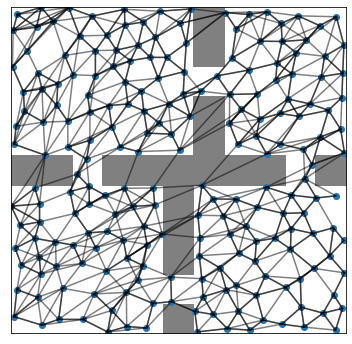

In [16]:
search_policy.keep_k_nearest(5)
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

Plotting 209 nodes and 820 edges


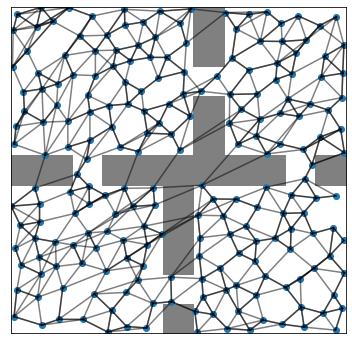

In [17]:
search_policy.keep_k_nearest(4)
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

Plotting 209 nodes and 623 edges


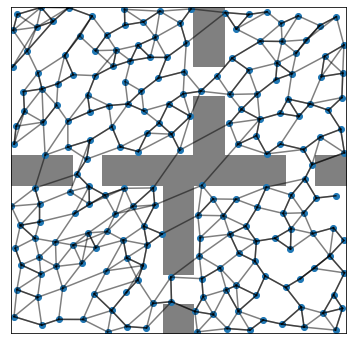

In [18]:
search_policy.keep_k_nearest(3)
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

Plotting 209 nodes and 417 edges


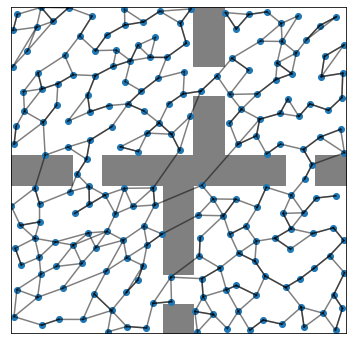

In [19]:
search_policy.keep_k_nearest(2)
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

Plotting 209 nodes and 209 edges


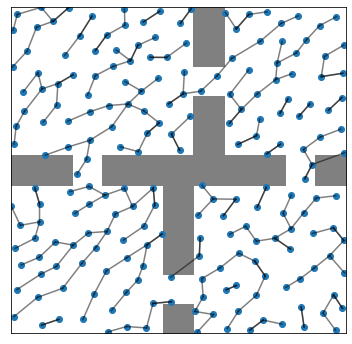

In [20]:
search_policy.keep_k_nearest(1)
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

# Calculate Euclidean distances

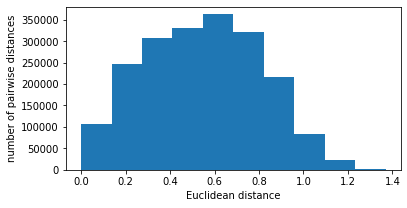

In [21]:
from scipy.spatial import distance
euclidean_dists = distance.pdist(rb_vec)

plt.figure(figsize=(6, 3))
plt.hist(euclidean_dists.flatten())
plt.xlabel('Euclidean distance')
plt.ylabel('number of pairwise distances')
plt.show()

# Initialize SGM search policy

In [22]:
from sgm.planner import SGMSearchPolicy
search_policy_type = "SGM"
agent.initialize_search(rb_vec, max_search_steps=10) # needed to set agent attributes that SGMSearchPolicy constructor queries
search_policy = SGMSearchPolicy(agent, pdist, rb_vec, rb_vec, cache_pdist = True)
agent.initialize_search(search_policy.rb_vec, max_search_steps=10)

# Cleanup and evaluate SGM

In [23]:
from sgm.evaluation import cleanup_and_eval

logdir = os.path.join(os.getcwd(), os.pardir, "logs")
eval_difficulty = 0.95
k_nearest = 5
eval_trials = 20
total_cleanup_steps = 50000
eval_period = 5000

logfolder = cleanup_and_eval(search_policy,
                             search_policy_type,
                             desc_name,
                             eval_tf_env,
                             logdir,
                             eval_difficulty=eval_difficulty,
                             k_nearest=k_nearest,
                             eval_trials=eval_trials,
                             total_cleanup_steps=total_cleanup_steps,
                             eval_period=eval_period)

SGM has initial success rate 0.75
Evaluated initial SGM success rate in 489.78 seconds
After filtering and 0 cleanup steps, SGM has success rate 0.95
Took 5000 cleanup steps and evaluated SGM success rate in 958.04 seconds
After filtering and 5000 cleanup steps, SGM has success rate 0.65
Took 5000 cleanup steps and evaluated SGM success rate in 1062.52 seconds
After filtering and 10000 cleanup steps, SGM has success rate 0.40
Took 5000 cleanup steps and evaluated SGM success rate in 1072.08 seconds
After filtering and 15000 cleanup steps, SGM has success rate 0.25
Took 5000 cleanup steps and evaluated SGM success rate in 1164.72 seconds
After filtering and 20000 cleanup steps, SGM has success rate 0.10
Took 5000 cleanup steps and evaluated SGM success rate in 1156.48 seconds
After filtering and 25000 cleanup steps, SGM has success rate 0.30
Took 5000 cleanup steps and evaluated SGM success rate in 1106.88 seconds
After filtering and 30000 cleanup steps, SGM has success rate 0.35
Took 5

In [ ]:
from sgm.evaluation import cleanup_and_eval

logdir = os.path.join(os.getcwd(), os.pardir, "logs")
eval_difficulty = 0.95
k_nearest = 5
eval_trials = 20
total_cleanup_steps = 50000
eval_period = 5000

logfolder = cleanup_and_eval(search_policy,
                             search_policy_type,
                             desc_name,
                             eval_tf_env,
                             logdir,
                             eval_difficulty=eval_difficulty,
                             k_nearest=k_nearest,
                             eval_trials=eval_trials,
                             total_cleanup_steps=total_cleanup_steps,
                             eval_period=eval_period)

# Load cleanup graphs

In [ ]:
from sgm.utils.visualization import *

search_policy.load(os.path.join(logfolder, search_policy_type.lower().replace(" ", "_") + "_initial"))
initial_graph = search_policy._g.copy()

search_policy.load(os.path.join(logfolder, search_policy_type.lower().replace(" ", "_") + "_filtered_0_cleanup_steps/"))
filtered_graph = search_policy._g.copy()

search_policy.load(os.path.join(logfolder, search_policy_type.lower().replace(" ", "_") + "_filtered_{}_cleanup_steps/".format(total_cleanup_steps)))
cleaned_graph = search_policy._g.copy()

pruned_graph = nx.difference(filtered_graph, cleaned_graph)

# Visualize cleanup graphs

In [ ]:
plot_points(search_policy.rb_vec, eval_tf_env)

In [ ]:
plot_graph(initial_graph, search_policy.rb_vec, eval_tf_env)

In [ ]:
plot_graph(filtered_graph, search_policy.rb_vec, eval_tf_env)

In [ ]:
plot_graph(cleaned_graph, search_policy.rb_vec, eval_tf_env)

In [ ]:
plot_graph(pruned_graph, search_policy.rb_vec, eval_tf_env)